<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_data_multi_delta_(_0_8)_n30_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_-0.8'

In [4]:
os.listdir(base_path)

['data_multi_delta_-0.8_n20.csv',
 'data_multi_delta_-0.8_n30.csv',
 'data_multi_delta_-0.8_n60.csv',
 'data_multi_delta_-0.8_n120.csv',
 'data_multi_delta_-0.8_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-0.8_n30.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,93.213726,96.959874,0.167084,200.340685,200.118744,0.221941
1,0.0,1.0,97.344993,52.184013,-0.027742,159.501264,159.417396,0.083868
2,0.0,2.0,39.145332,65.099879,-0.116105,114.129107,114.226355,-0.097248
3,0.0,3.0,87.825931,45.194634,-0.145104,142.875461,142.913714,-0.038254
4,0.0,4.0,93.784249,42.577804,-0.002535,146.359517,146.244225,0.115292
...,...,...,...,...,...,...,...,...
29995,999.0,25.0,52.417240,72.671736,0.015326,135.104302,135.109234,-0.004932
29996,999.0,26.0,91.135549,67.082177,0.330772,168.548498,168.218509,0.329989
29997,999.0,27.0,68.068164,96.793702,-0.098457,174.763409,174.860294,-0.096885
29998,999.0,28.0,28.364498,87.252062,0.079780,125.696340,125.643040,0.053300


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,93.213726,96.959874,0.167084,200.340685,200.118744,0.221941
1,0.0,1.0,97.344993,52.184013,-0.027742,159.501264,159.417396,0.083868
2,0.0,2.0,39.145332,65.099879,-0.116105,114.129107,114.226355,-0.097248
3,0.0,3.0,87.825931,45.194634,-0.145104,142.875461,142.913714,-0.038254
4,0.0,4.0,93.784249,42.577804,-0.002535,146.359517,146.244225,0.115292
...,...,...,...,...,...,...,...,...
29995,999.0,25.0,52.417240,72.671736,0.015326,135.104302,135.109234,-0.004932
29996,999.0,26.0,91.135549,67.082177,0.330772,168.548498,168.218509,0.329989
29997,999.0,27.0,68.068164,96.793702,-0.098457,174.763409,174.860294,-0.096885
29998,999.0,28.0,28.364498,87.252062,0.079780,125.696340,125.643040,0.053300


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    93.213726  96.959874  0.167084  200.340685  200.118744  0.221941
      1.0    97.344993  52.184013 -0.027742  159.501264  159.417396  0.083868
      2.0    39.145332  65.099879 -0.116105  114.129107  114.226355 -0.097248
      3.0    87.825931  45.194634 -0.145104  142.875461  142.913714 -0.038254
      4.0    93.784249  42.577804 -0.002535  146.359517  146.244225  0.115292
...                ...        ...       ...         ...         ...       ...
999.0 25.0   52.417240  72.671736  0.015326  135.104302  135.109234 -0.004932
      26.0   91.135549  67.082177  0.330772  168.548498  168.218509  0.329989
      27.0   68.068164  96.793702 -0.098457  174.763409  174.860294 -0.096885
      28.0   28.364498  87.252062  0.079780  125.696340  125.643040  0.053300
      29.0   86.993862  66.346802 -0.244751  163.095913  163.344236 -0.248323

[30000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    93.213726  96.959874  0.167084  200.340685  200.118744  0.221941
      1.0    97.344993  52.184013 -0.027742  159.501264  159.417396  0.083868
      2.0    39.145332  65.099879 -0.116105  114.129107  114.226355 -0.097248
      3.0    87.825931  45.194634 -0.145104  142.875461  142.913714 -0.038254
      4.0    93.784249  42.577804 -0.002535  146.359517  146.244225  0.115292
...                ...        ...       ...         ...         ...       ...
999.0 25.0   52.417240  72.671736  0.015326  135.104302  135.109234 -0.004932
      26.0   91.135549  67.082177  0.330772  168.548498  168.218509  0.329989
      27.0   68.068164  96.793702 -0.098457  174.763409  174.860294 -0.096885
      28.0   28.364498  87.252062  0.079780  125.696340  125.643040  0.053300
      29.0   86.993862  66.346802 -0.244751  163.095913  163.344236 -0.248323

[30000 rows x 6 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,93.213726,96.959874,0.167084,200.340685,200.118744,0.221941
1,0.0,1.0,97.344993,52.184013,-0.027742,159.501264,159.417396,0.083868
2,0.0,2.0,39.145332,65.099879,-0.116105,114.129107,114.226355,-0.097248
3,0.0,3.0,87.825931,45.194634,-0.145104,142.875461,142.913714,-0.038254
4,0.0,4.0,93.784249,42.577804,-0.002535,146.359517,146.244225,0.115292
...,...,...,...,...,...,...,...,...
29995,999.0,25.0,52.417240,72.671736,0.015326,135.104302,135.109234,-0.004932
29996,999.0,26.0,91.135549,67.082177,0.330772,168.548498,168.218509,0.329989
29997,999.0,27.0,68.068164,96.793702,-0.098457,174.763409,174.860294,-0.096885
29998,999.0,28.0,28.364498,87.252062,0.079780,125.696340,125.643040,0.053300


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    93.213726  96.959874  0.167084  200.340685  200.118744  0.221941
      1.0    97.344993  52.184013 -0.027742  159.501264  159.417396  0.083868
      2.0    39.145332  65.099879 -0.116105  114.129107  114.226355 -0.097248
      3.0    87.825931  45.194634 -0.145104  142.875461  142.913714 -0.038254
      4.0    93.784249  42.577804 -0.002535  146.359517  146.244225  0.115292
...                ...        ...       ...         ...         ...       ...
999.0 25.0   52.417240  72.671736  0.015326  135.104302  135.109234 -0.004932
      26.0   91.135549  67.082177  0.330772  168.548498  168.218509  0.329989
      27.0   68.068164  96.793702 -0.098457  174.763409  174.860294 -0.096885
      28.0   28.364498  87.252062  0.079780  125.696340  125.643040  0.053300
      29.0   86.993862  66.346802 -0.244751  163.095913  163.344236 -0.248323

[30000 rows x 6 columns]

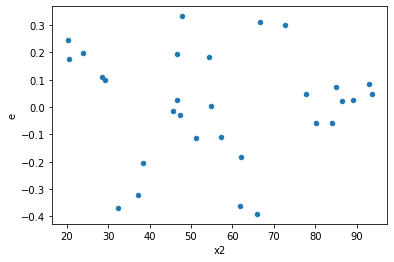

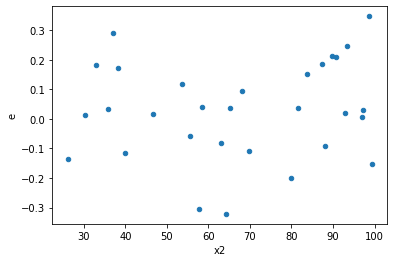

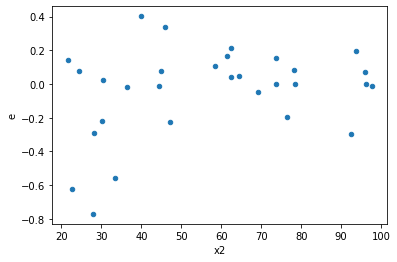

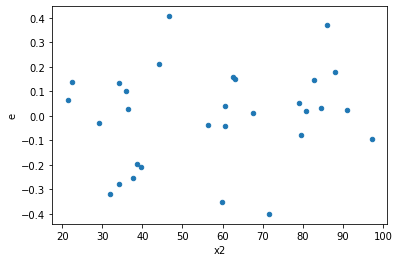

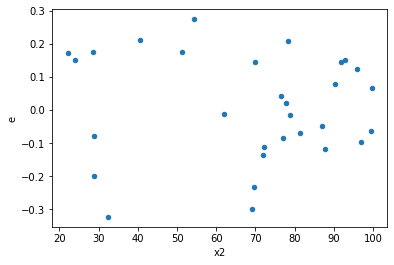

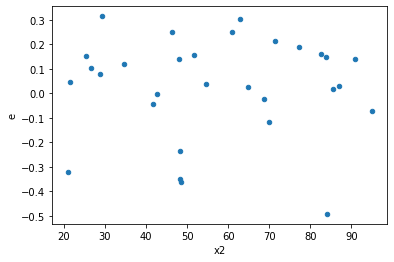

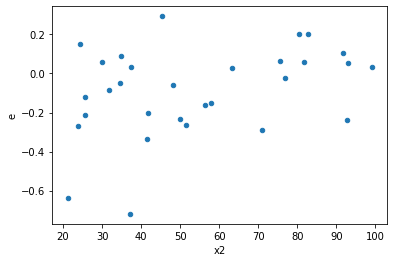

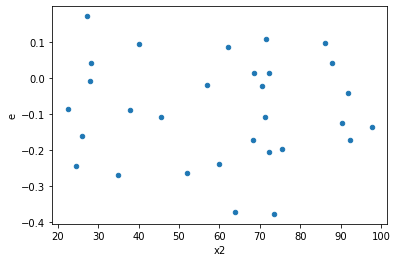

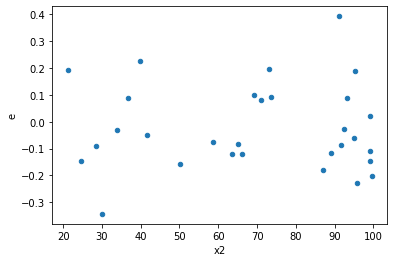

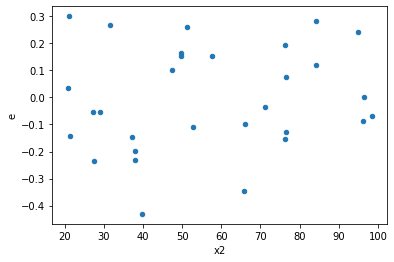

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x2
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,10.0,10.0,0.3425720639424262,0.4022786625051879,0.034257206394242616,0.04022786625051879,1.1742891637912314,0.804413652834008,0.597793173582996,0.402206826417004,Reject005=1 : Homoscedasticity
3.0,10.0,10.0,0.22377785937875586,0.3029821310004889,0.022377785937875587,0.030298213100048887,1.3539415018162078,0.6409003315052595,0.6795498342473703,0.32045016575262975,Reject005=1 : Homoscedasticity
5.0,10.0,10.0,0.2566534126219932,0.26030390361773303,0.02566534126219932,0.026030390361773303,1.014223426676646,0.9826232599066997,0.5086883700466501,0.49131162995334987,Reject005=1 : Homoscedasticity
9.0,10.0,10.0,0.35369394604809556,0.3554521115241383,0.035369394604809555,0.03554521115241383,1.0049708667498756,0.9938987182619079,0.503050640869046,0.49694935913095395,Reject005=1 : Homoscedasticity
15.0,10.0,10.0,0.3670576423346161,0.3900581694764481,0.036705764233461606,0.03900581694764481,1.0626618941797277,0.9253307544291771,0.5373346227854114,0.46266537721458856,Reject005=1 : Homoscedasticity
17.0,10.0,10.0,0.18487827569482881,0.2204420589699919,0.018487827569482883,0.022044205896999187,1.1923632354396618,0.7862726109182243,0.6068636945408878,0.39313630545911216,Reject005=1 : Homoscedasticity
22.0,10.0,10.0,0.26048320538212477,0.34854228851463587,0.026048320538212478,0.03485422885146359,1.3380605018405305,0.6539066327977419,0.6730466836011291,0.32695331639887093,Reject005=1 : Homoscedasticity
29.0,10.0,10.0,0.16529626869179662,0.44957570434262323,0.01652962686917966,0.04495757043426232,2.7198176214181835,0.13019358216625343,0.9349032089168733,0.06509679108312671,Reject005=1 : Homoscedasticity
32.0,10.0,10.0,0.33682327345335733,0.37134802831840247,0.03368232734533573,0.037134802831840244,1.1025010965277793,0.8804038094052622,0.5597980952973689,0.4402019047026311,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,10.0,10.0,0.3425720639424262,0.4022786625051879,0.034257206394242616,0.04022786625051879,1.1742891637912314,0.804413652834008,Reject005=1 : Homoscedasticity
1.0,10.0,10.0,0.28335300381731604,0.1260641377715813,0.028335300381731605,0.01260641377715813,0.44490136357565363,0.21758865608486627,Reject005=1 : Homoscedasticity
2.0,10.0,10.0,0.4740094001874708,0.23234916893789964,0.047400940018747076,0.023234916893789963,0.4901783990908314,0.2763687265629013,Reject005=1 : Homoscedasticity
3.0,10.0,10.0,0.22377785937875586,0.3029821310004889,0.022377785937875587,0.030298213100048887,1.3539415018162078,0.6409003315052595,Reject005=1 : Homoscedasticity
4.0,10.0,10.0,0.5634156996393362,0.23804623301517971,0.05634156996393362,0.02380462330151797,0.4225055020077753,0.19038586084429915,Reject005=1 : Homoscedasticity
5.0,10.0,10.0,0.2566534126219932,0.26030390361773303,0.02566534126219932,0.026030390361773303,1.014223426676646,0.9826232599066997,Reject005=1 : Homoscedasticity
6.0,10.0,10.0,0.7104457439077551,0.39743814066623767,0.07104457439077551,0.039743814066623764,0.5594208200617237,0.37359875745449783,Reject005=1 : Homoscedasticity
7.0,10.0,10.0,0.6225720325580495,0.27214863476729034,0.06225720325580495,0.027214863476729034,0.4371359787060701,0.20800230959310517,Reject005=1 : Homoscedasticity
8.0,10.0,10.0,0.38171578777680304,0.2710842357288403,0.03817157877768031,0.027108423572884028,0.7101729726917889,0.598503063976599,Reject005=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      823
Reject005=0 : Heteroscedasticity    177
Name: Result_test, dtype: int64